<h3><center><font size=10>Logistic regression model using Iris dataset </center></font></h3>

<font color = "grey"><font size = 5> Context </font>
    
<font size = 2> Iris dataset consists of 150 samples of iris flowers, with 50 samples from each of three species: setosa, versicolor, and virginica.
The measurements were taken from three different species of iris flowers, providing a multivariate dataset for analysis.</br>It contains measurements of iris flowers across four features: sepal length, sepal width, petal length, and petal width.</font>

<br/>
<font color = "grey" size = 5> Problem Statement </font>

The goal is to predict the species of the iris based on these features

<br/>
<font color = "grey" size = 5> Data Dictionary </font>

1.Sepal Length: Length of the sepal (in centimeters).</br>
2.Sepal Width: Width of the sepal (in centimeters).</br>
3.Petal Length: Length of the petal (in centimeters).</br>
4.Petal Width: Width of the petal (in centimeters).</br>
5.Species: The class label indicating the species of iris flowers (setosa, versicolor, or virginica)

<br/>
<font color = "grey" size = 5> Importing Libraries </font>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing necessary libraries for data analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [3]:
# Import Iris Dataset from sklearn
from sklearn.datasets import load_iris

In [4]:
# Load Iris Data
iris = load_iris()

<font color = "grey" size = 4> Preparing Iris Data</font>

In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)

In [7]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
target_df = pd.DataFrame(data= iris.target, columns= ['species'])

In [11]:
def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'

In [12]:
target_df['species'] = target_df['species'].apply(converter)

In [13]:
target_df

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [14]:
iris_df = pd.concat([iris_df, target_df], axis= 1)

In [15]:
# Displaying the first few rows of the Data
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<font color = "grey" size = 4>Checking the numbers of rows and columns</font>

In [16]:
# Retrieving the column names of the Data
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [17]:
# Retrieving the dimensions (number of rows and columns) of the Data
iris_df.shape

(150, 5)

<font color = "grey" size = 4>Checking column type and missing values of iris dataset</font>

In [18]:
# Displaying concise information about the Data
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<font color = "grey" size = 3>Observations</font>



*   There are 150 rows and 5 columns
*   Column names have spaces which we would fix
*   There is only one independent object variable, four numerical independent variable and dependent variable is of float type.

<font color = "grey" size = 4>Fixing spaces between Column name</font>

In [19]:

# Replacing spaces in column names with underscores in the Data to make us easier to call column names

iris_df.columns=iris_df.columns.str.replace(" ","_")
iris_df

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<font color = "grey" size = 4>Checking null values</font>

In [20]:
# Checking the number of missing values
iris_df.isnull().sum()

sepal_length_(cm)    0
sepal_width_(cm)     0
petal_length_(cm)    0
petal_width_(cm)     0
species              0
dtype: int64

<font color = "grey" size = 4>Observation</font>
 We can see that there are no null values in this data set

<font color = "grey" size = 4>Checking the unique values</font>

In [21]:
# Check the unique values in each column of the dataframe.
iris_df.nunique()

sepal_length_(cm)    35
sepal_width_(cm)     23
petal_length_(cm)    43
petal_width_(cm)     22
species               3
dtype: int64

In [22]:
iris_df.describe(include="all")

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


<font size =3> Insights: </font>

*   The "species" column has 3 unique values. i.e. The values are setosa, versicolor, and virginica
*   sepal length starts from 4.30 to 7.90
*   Average of species is 1.

<br/>
<font color = "grey" size = 5>Exploratory Data Analysis</font>

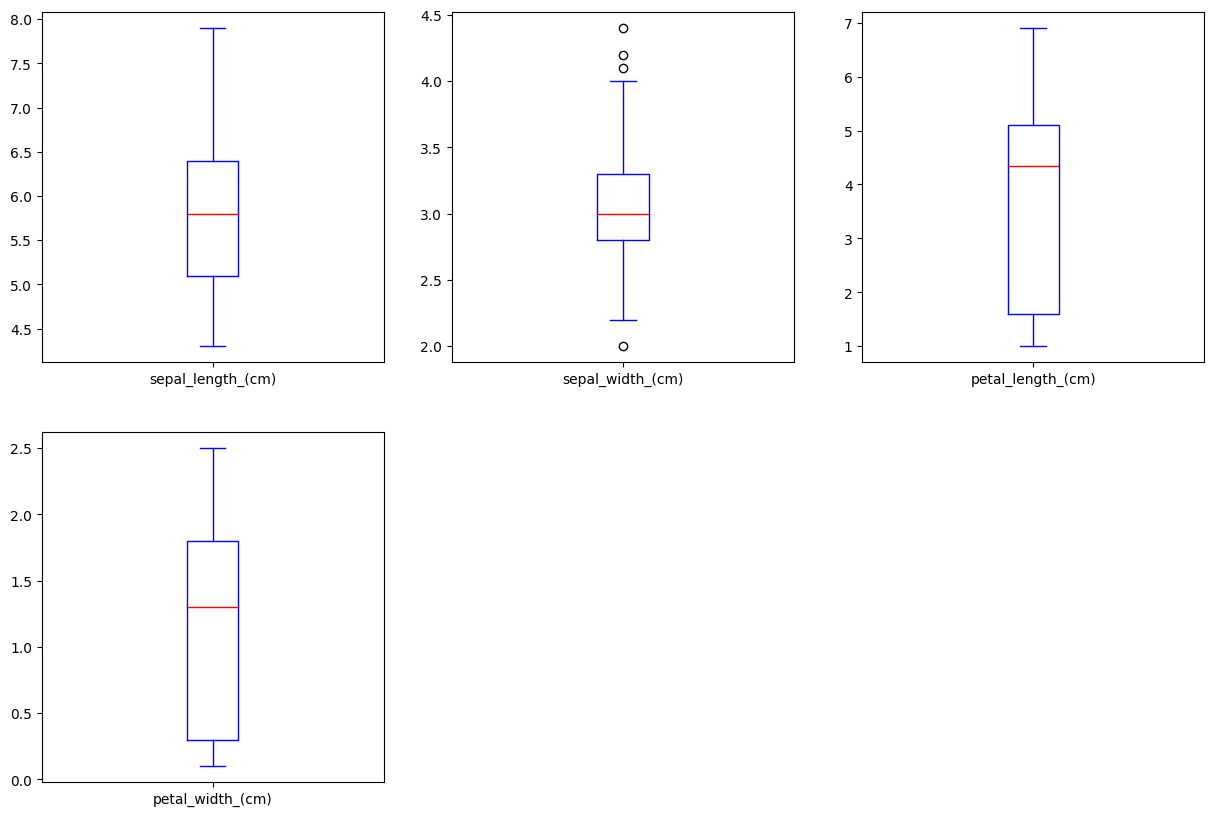

In [23]:
boxplot=iris_df.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, colormap='bwr', figsize=(15,10))

From the boxplot, it is visible that only sepal width is having the outlier, whereas sepallength, petallength, petalwidth having datapoints within min and maxrange.
It is visible that values in sepallength and sepalwidth are tightly distributed and IQ range is small, whereas in petallength and petalwidth the values are distibuted widely,so IQ range are high.

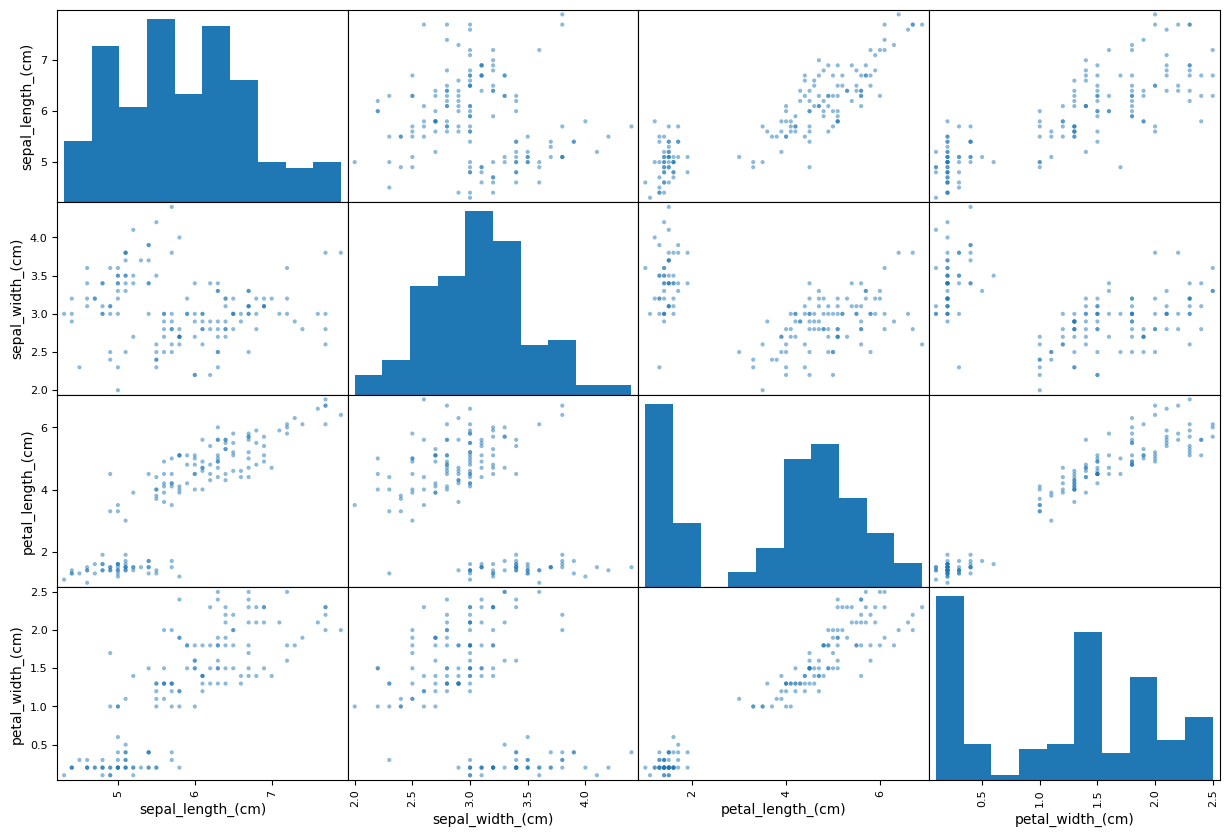

In [24]:
#Combine scatterplot to explore relation b/w sepallength, sepalwidth, petalwidth, petallength

scatter=pd.plotting.scatter_matrix(iris_df,figsize=(15,10))

From correlation matrix and scatterplot, it is clear that independent variable Petal.Length and Petal.width are positively and strongly correlated to Sepal.Length. Whereas Sepal.Width is negatively and weakly correlated to Sepal.Length. It also provide the insight of multicollinearity between the variable Petal.Length and Petal.Width

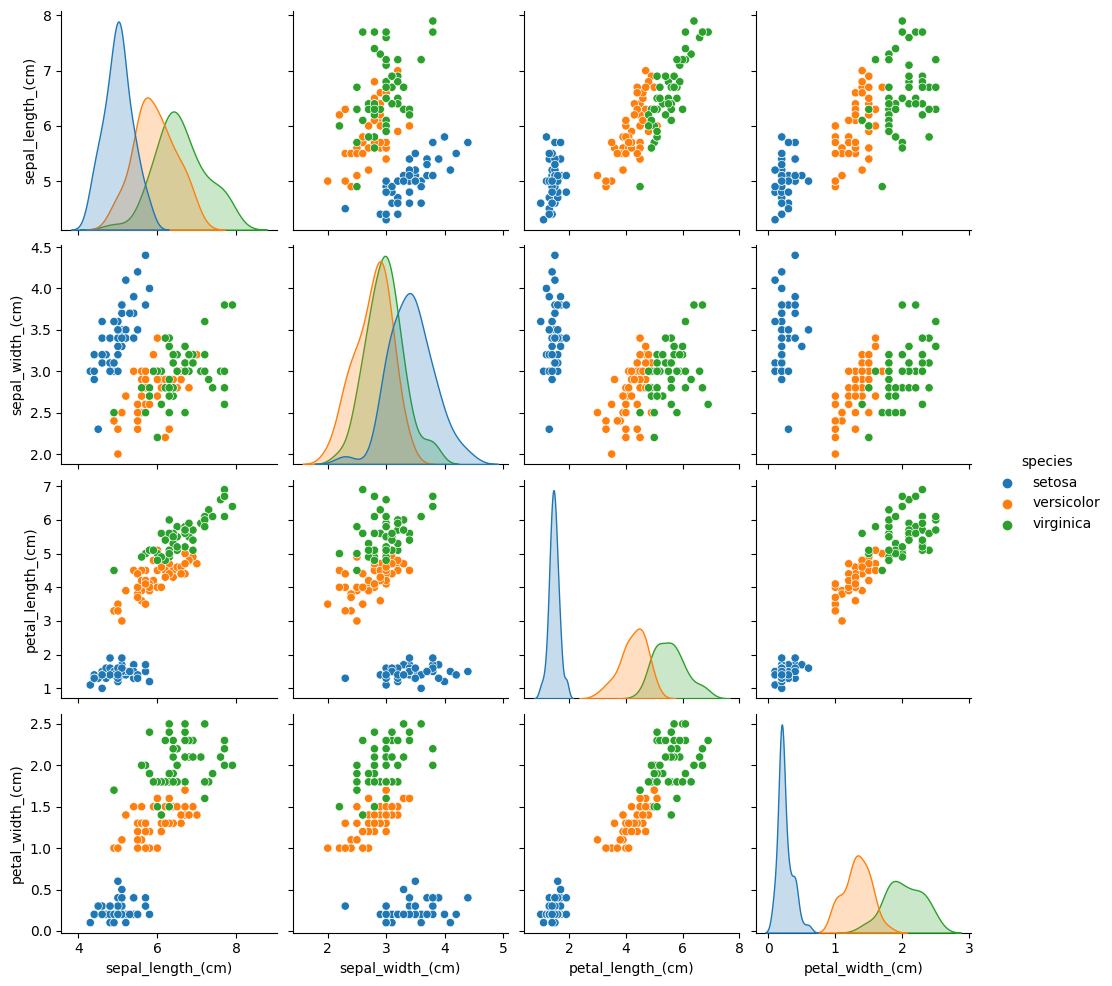

In [25]:
#Scatterplot EDA b/w sepallength, sepalwidth, petalwidth, petallength and how species are reacting to it.

scatterplot=sns.pairplot(iris_df,hue="species")

<font color = "grey" size = 4>Correlation </font>

In [26]:
# Correlation Matrix for Iris_dataset
correlation_matrix=iris_df.corr()

correlation_matrix

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm)
sepal_length_(cm),1.000000,-0.117570,0.871754,0.817941
sepal_width_(cm),-0.117570,1.000000,-0.428440,-0.366126
petal_length_(cm),0.871754,-0.428440,1.000000,0.962865
petal_width_(cm),0.817941,-0.366126,0.962865,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

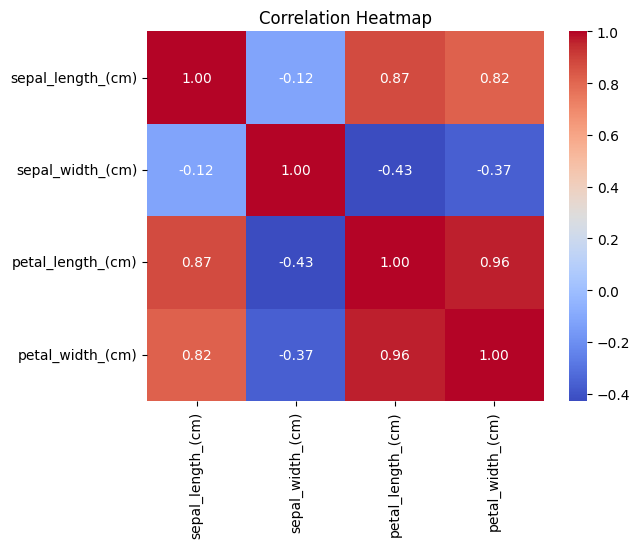

In [27]:
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

<font color = "grey" size = 3>Observation </font>
* From this we can see that petal lengh, petal width and species are mostly correlated to each other.

<font color = "grey" size = 5>Model building </font>

In [28]:
iris_df.drop('species', axis= 1, inplace= True)

In [29]:
target_df = pd.DataFrame(columns= ['species'], data= iris.target)

In [30]:
iris_df = pd.concat([iris_df, target_df], axis= 1)

In [31]:
# Variables
X= iris_df.drop(labels= "species", axis= 1)
y= iris_df["species"]

In [32]:
X

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [35]:
X_train.shape

(105, 4)

In [36]:
X_test.shape

(45, 4)

In [37]:
y_train.shape

(105,)

In [38]:
y_test.shape

(45,)

Build Models We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results. Let’s test 6 different algorithms:

Logistic Regression (LR)
Linear Discriminant Analysis (LDA)
K-Nearest Neighbors (KNN)
Classification and Regression Trees (CART).
Gaussian Naive Bayes (NB).
Support Vector Machines (SVM).
This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. Let’s build and evaluate our models:

In [43]:
#Fitting linear model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [45]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.960909 (0.047941)
LDA: 0.950909 (0.066457)
KNN: 0.950909 (0.080103)
CART: 0.922727 (0.084624)
NB: 0.931818 (0.075213)
SVM: 0.940909 (0.079591)


Let's create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (via 10 fold-cross validation). A useful way to compare the samples of results for each algorithm is to create a box and whisker plot for each distribution and compare the distributions

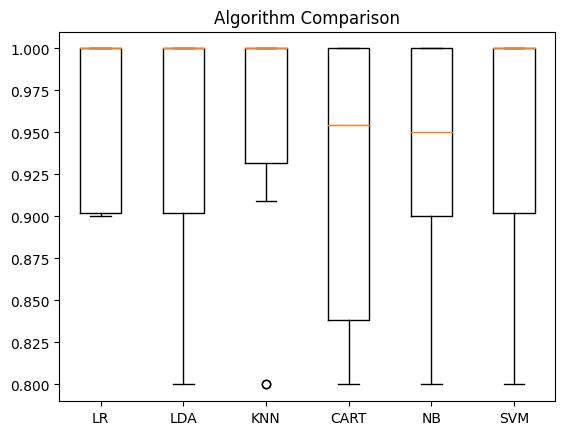

In [46]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

We can see that the box and whisker plots are squashed at the top of the range, with many evaluations achieving 100% accuracy, and some pushing down into the high 80% accuracies.

Make Predictions We must choose an algorithm to use to make predictions. The results in the previous section suggest that the SVM was perhaps the most accurate model. We will use this model as our final model.

In [49]:
#Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [52]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [55]:
#Evaluate predictions
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Summary In this notebook, you discovered step-by-step how to complete machine learning project in Python. You discovered that completing a small end-to-end project from loading the data to making predictions is the best way to get familiar with a new platform.

<font color = "grey" size = 5>Conclusion </font>

* Now this is our final model which follows all the assumptions and this can be used for interpretations
* After building the model and analyzing it we can say that the Years_of _Driving_Experience is the main factor which affect the insurance losses rate.
* Age is the second factor which affect the losses incurred by the insurance company according to the result.

